In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
4998       7       0       0       0       0       0       0       0       0   
22296      1       0       0       0       0       0       0       0       0   
8675       1       0       0       0       0       0       0       0       0   
18754      5       0       0       0       0       0       0       0       0   
13942      1       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
4998        0  ...         0         0         0         0         0   
22296       0  ...         0         0         0         0         0   
8675        0  ...         0         0         0         0         0   
18754       0  ...         0         0         0         0         0   
13942       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
4998          0         0         0         0         0  
22296         0         0         0         0         0  
8675          0         0         0         0         0  
18754         0         0         0         0         0  
13942         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
import matplotlib.pyplot as plt

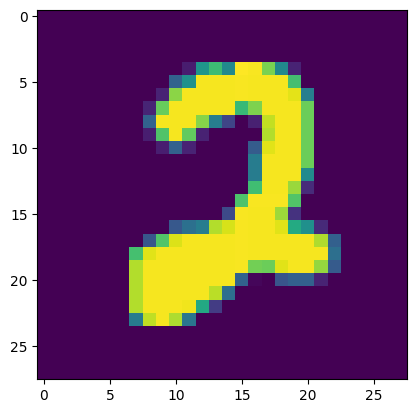

In [5]:
# plt.imshow(df.iloc[3228])
plt.imshow(df.iloc[4635,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import  train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
import time
strat = time.time()
y_pred = knn.predict(X_test)
print(time.time() - strat)

7.150142192840576


In [13]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test,y_pred)

0.9648809523809524

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# pca

from sklearn.decomposition import  PCA
pca = PCA(n_components=200)

In [17]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [18]:
X_train_trf.shape

(33600, 200)

In [19]:
knnn = KNeighborsClassifier()

In [20]:
knnn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knnn.predict(X_test_trf)

In [22]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [23]:
# for i in range(1,785):
#     pca = PCA(n_components=1)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
    
#     knn = KNeighborsClassifier()
    
#     knn.fit(X_train_trf,y_train)
    
#     y_pred = knn.predict(X_test_trf)
    
#     print(accuracy_score(y_test,y_pred))

In [24]:
# transfrom to 2D  coodinae system

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

# transforming to z 2D coordinate system

# pca = PCA(n_components=2)
# X_train_trf = pca.fit_transform(X_train)
# X_test_trf = pca.fit_transform(X_test)

In [25]:
X_train_trf

array([[-2.71861849, -0.49011341],
       [-0.67704962, -6.75317247],
       [-3.03321924,  6.51001612],
       ...,
       [ 2.14876046,  0.78159738],
       [ 1.05962337,  0.94706637],
       [17.70257281,  1.96172674]])

In [26]:
import plotly.express as px
y_train_trf  = y_train.astype(str)
fig  = px.scatter(x=X_train_trf[:,0],
                  y = X_train_trf[:,1],
                  color = y_train_trf,
                  color_discrete_sequence = px.colors.qualitative.G10
                  )
fig.show()

In [27]:
# treasnforming in 3D

pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_tst_trf = pca.fit_transform(X_test)

In [28]:
X_train_trf

array([[-2.71862328, -0.48992837,  1.13598529],
       [-0.67696871, -6.75388734, -2.33587935],
       [-3.0332475 ,  6.51009714,  7.49144291],
       ...,
       [ 2.14881563,  0.78072073, -0.74782926],
       [ 1.05957981,  0.94760689,  3.95050963],
       [17.7026028 ,  1.96189775, -4.94290239]])

In [29]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin = dict(l=20 , r=20 , t=20 , b=20)
)
fig.show()

In [30]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                    color = y_train_trf)
fig.update_layout(
    margin = dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [31]:
# Eigen value
pca.explained_variance_

array([692.55228737, 139.53877134,  41.34548262])

In [32]:
pca.components_.shape

(3, 784)

In [33]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
pca.explained_variance_.shape

(784,)

In [35]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

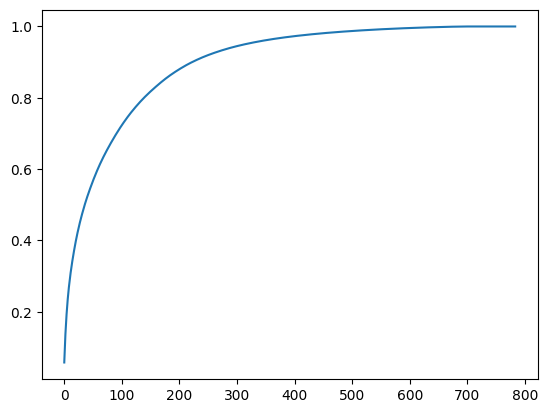

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))